In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the file
df = pd.read_csv("book_data.csv")
#Reading the first five records
df = df.dropna()
df.head(20)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
5,Markus Zusak,Trying to make sense of the horrors of World W...,First American Edition (US / CAN),Hardcover,9.78038E+12,552 pages,4.36,1485632,100821,The Book Thief,Historical|Historical Fiction|Fiction|Young Adult,https://images.gr-assets.com/books/1522157426l...
6,C.S. Lewis|Pauline Baynes,"Journeys to the end of the world, fantastic cr...",Reissue Edition,Paperback,9.78007E+12,767 pages,4.25,437829,9439,The Chronicles of Narnia,Fantasy|Classics|Fiction|Young Adult|Childrens,https://images.gr-assets.com/books/1449868701l...
9,J.R.R. Tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,Mass Market Paperback,9.78035E+12,1728 pages,4.59,99793,1652,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...
13,Emily Brontë|Richard J. Dunn|David Timson|Char...,You can find the redesigned cover of this edit...,Fourth Edition,Paperback,9.78039E+12,464 pages,3.84,1121100,29400,Wuthering Heights,Classics|Fiction|Romance|Literature,https://images.gr-assets.com/books/1388212715l...
15,Arthur Golden,"A literary sensation and runaway bestseller, t...",Large Print,Hardcover,9.78074E+12,434 pages,4.09,1525851,27168,Memoirs of a Geisha,Fiction|Historical|Historical Fiction|Romance|...,https://images.gr-assets.com/books/1388367666l...
17,Oscar Wilde|Jeffrey Eugenides,"﻿Written in his distinctively dazzling manner,...",Modern Library Classics,Paperback,9.78038E+12,367 pages,4.06,775701,22938,The Picture of Dorian Gray,Fiction|Classics|Horror|Fantasy|Literature|Got...,https://images.gr-assets.com/books/1424596966l...
20,Charlotte Brontë|Michael Mason,"Fiery love, shocking twists of fate, and tragi...",Penguin Classics,Paperback,9.78014E+12,507 pages,4.11,1381404,34670,Jane Eyre,Classics|Fiction|Romance|Historical|Historical...,https://images.gr-assets.com/books/1327867269l...


In [ ]:
df2 = df['genres'].str.split('|', expand=True)
df2.head(10)
df['genres'] = df2[0]

df.drop_duplicates('book_title', inplace=True)



In [3]:
#Checking the shape of the file, we got 54k entries of book data with 12 features
df.shape

(3535, 12)

In [4]:
# Genre distribution
df['genres'].value_counts()

Fantasy|Young Adult|Fiction                                                                                                                  26
Fiction                                                                                                                                      17
Fantasy|Fiction|Fantasy|Epic Fantasy                                                                                                         17
Classics|Fiction|Romance                                                                                                                     15
Science Fiction|Fiction                                                                                                                      15
Classics|Fiction|Science Fiction|Science Fiction|Dystopia                                                                                    14
Classics|Fantasy|Fiction|Childrens                                                                                                      

In [7]:
# Printing the book title and description randomly
df['book_title'][13]

'Wuthering Heights'

In [8]:
df['book_desc'][13]

"You can find the redesigned cover of this edition HERE.This best-selling Norton Critical Edition is based on the 1847 first edition of the novel. For the Fourth Edition, the editor has collated the 1847 text with several modern editions and has corrected a number of variants, including accidentals. The text is accompanied by entirely new explanitory annotations.New to the fourth Edition are twelve of Emily Bronte's letters regarding the publication of the 1847 edition of Wuthering Heights as well as the evolution of the 1850 edition, prose and poetry selections by the author, four reviews of the novel, and poetry selections by the author, four reviews of the novel, and Edward Chitham's insightful and unformative chronology of the creative process behind the beloved work.Five major critical interpretations of Wuthering Heights are included, three of them new to the Fourth Edition. A Stuart Daley considers teh mimportance of chronology in the novel. J. Hillis Miller examines Wuthering H

# Exploration by Bigram and Trigram 

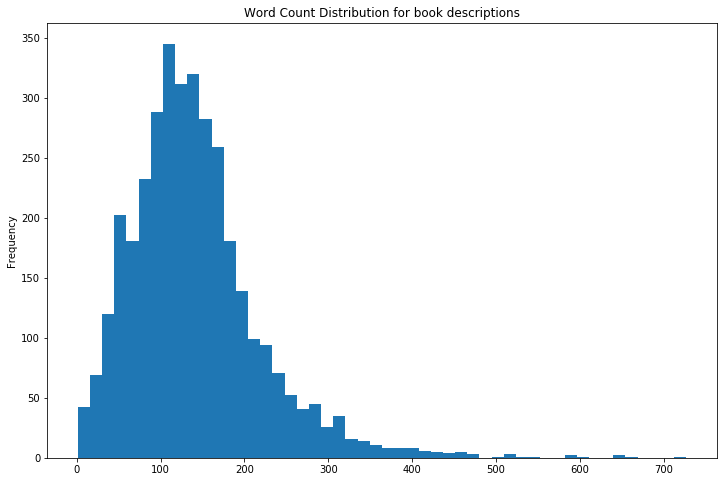

In [9]:
# Calculating the word count for book description
df['word_count'] = df['book_desc'].apply(lambda x: len(str(x).split()))
# Plotting the word count
df['word_count'].plot(
    kind='hist',
    bins = 50,
    figsize = (12,8),title='Word Count Distribution for book descriptions')

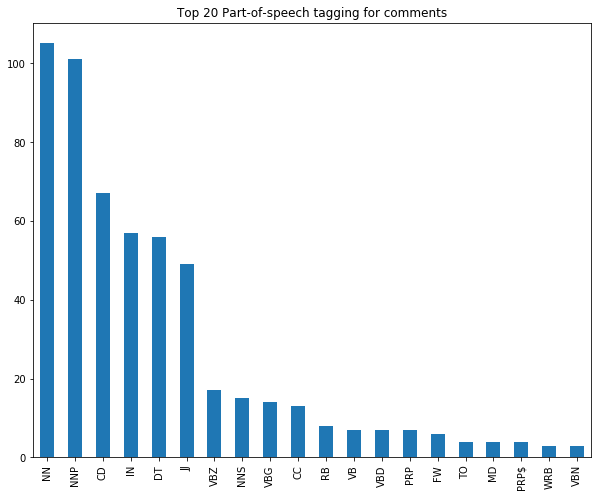

In [10]:
from textblob import TextBlob
blob = TextBlob(str(df['book_desc']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:20]
pos_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 20 Part-of-speech tagging for comments")

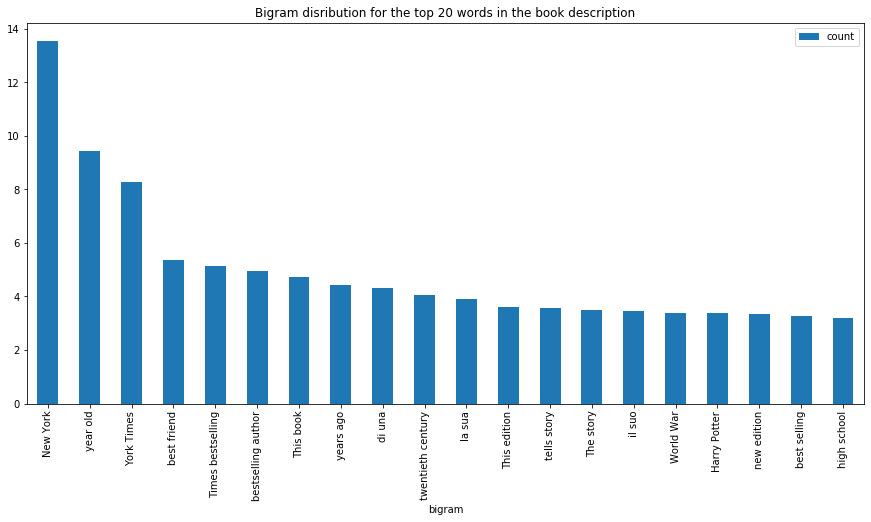

In [11]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['book_desc'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(20)
#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

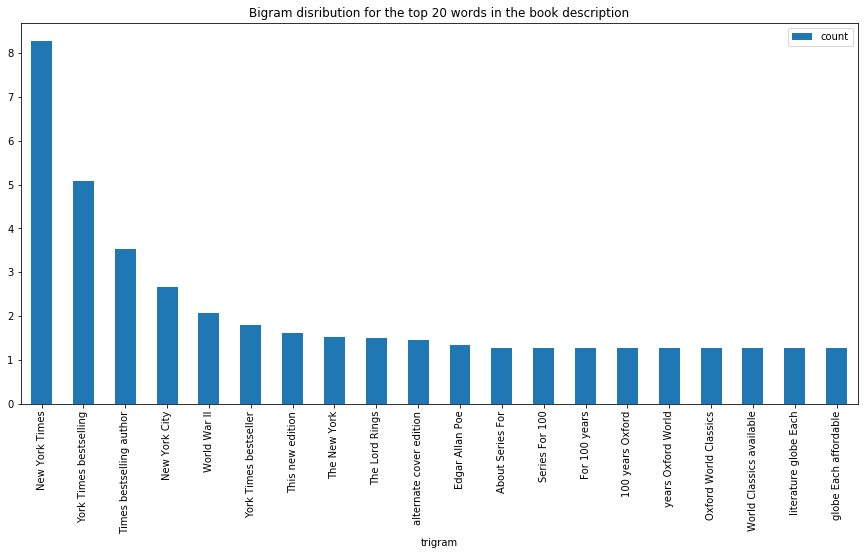

In [12]:
#Converting text descriptions into vectors using TF-IDF using Trigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(df['book_desc'].values.astype('U'))
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
trigram = pd.DataFrame(freq)
trigram.rename(columns = {0:'trigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
trigram = trigram.head(20)
#Plotting the trigramn distribution
trigram.plot(x ='trigram', y='count', kind = 'bar', title = "Bigram disribution for the top 20 words in the book description", figsize = (15,7), )

In [17]:
# Function for recommending books based on Book title. It takes book title and genre as an input.
def recommend(title, genre):
    
    # Matching the genre with the dataset and reset the index
    data = df.loc[df['genres'] == genre]  
    data.reset_index(level = 0, inplace = True) 
  
    # Convert the index into series
    indices = pd.Series(data.index, index = data['book_title'])
    
    #Converting the book title into vectors and used bigram
    tf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2), min_df = 1, stop_words='english')
    tfidf_matrix = tf.fit_transform(data['book_title'])
    
    # Calculating the similarity measures based on Cosine Similarity
    sg = linear_kernel(tfidf_matrix, tfidf_matrix)
    
    # Get the index corresponding to original_title
       
    idx = indices[title]
    # Get the pairwsie similarity scores 
    sig = list(enumerate(sg[idx]))
    # Sort the books
    sig = sorted(sig, key=lambda x: x[1], reverse=True)
    # Scores of the 5 most similar books 
    sig = sig[1:6]
    # Book indicies
    movie_indices = [i[0] for i in sig]
   
    # Top 5 book recommendation
    rec = data[['book_title', 'image_url']].iloc[movie_indices]
    print(rec['book_title'])   
    # It reads the top 5 recommend book url and print the images
    for i in rec['image_url']:
        response = requests.get(i)
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)

# Use Fantasy, Young Adult, Fiction to this Harry Potter title below

# list of usable book with genres :
recommend("Harry Potter and the Order of the Phoenix", "Fantasy")
recommend("Charlotte's Web", "Classics")
recommend("Romeo and Juliet", "Classics")
recommend("Harry Potter and the Goblet of Fire", "Fantasy")

77                  Harry Potter Collection
6      Harry Potter and the Deathly Hallows
118    Harry Potter and the Deathly Hallows
205    Harry Potter and the Deathly Hallows
219    Harry Potter and the Deathly Hallows
Name: book_title, dtype: object


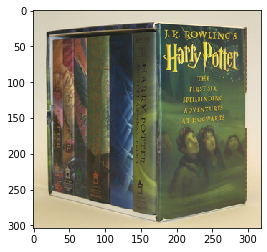

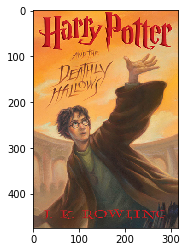

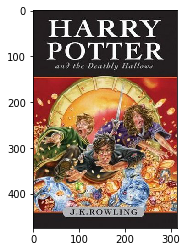

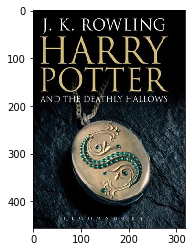

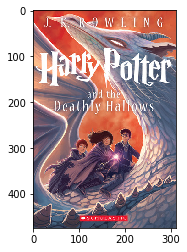

In [36]:
recommend("Harry Potter and the Goblet of Fire", "Fantasy")